In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("cache/simulation_results.csv")
df

,n_sites,deployment_days_per_site,replicate,method,split,covs_rmse,psi_rmse,z_acc,time
0,50,28,0,spOcc,train,0.255849,0.474605,0.575000,1.350106
1,50,28,0,spOcc,test,0.255849,0.494786,0.600000,1.350106
2,50,28,0,Unmarked,train,0.244076,0.474529,0.575000,0.453774
3,50,28,0,Unmarked,test,0.244076,0.494426,0.600000,0.453774
4,50,28,0,NumPyro,train,0.240277,0.474664,0.550000,17.937065
...,...,...,...,...,...,...,...,...,...
1195,10000,365,9,spOcc,test,0.054687,0.402677,0.758000,137.107983
1196,10000,365,9,Unmarked,train,0.108152,0.399837,0.764375,13.283429
1197,10000,365,9,Unmarked,test,0.108152,0.403000,0.757000,13.283429
1198,10000,365,9,NumPyro,train,0.053741,0.399642,0.766375,31.167161


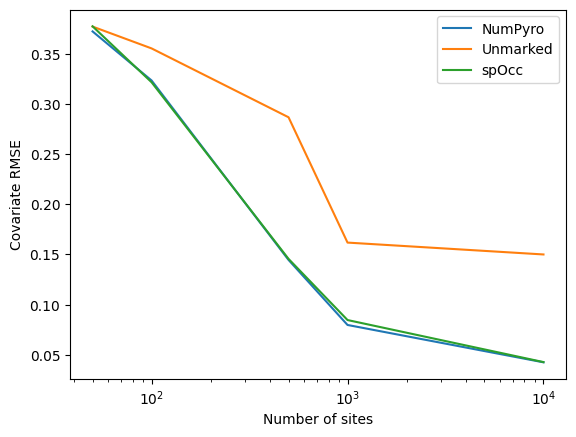

In [3]:
dfm = df.groupby(["n_sites", "deployment_days_per_site", "method", "split"]).mean().reset_index()
dfm[(dfm.deployment_days_per_site == 365) & (dfm.split == "train")].set_index("n_sites").groupby("method")["covs_rmse"].plot(x="n_sites", xlabel="Number of sites", ylabel="Covariate RMSE", legend=True)
plt.xscale("log")

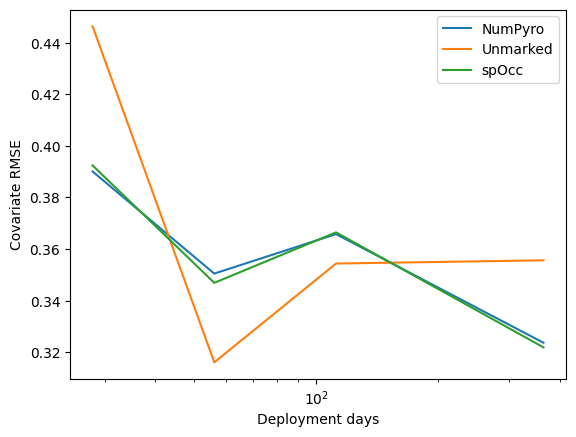

In [10]:
dfm = df.groupby(["n_sites", "deployment_days_per_site", "method", "split"]).mean().reset_index()
dfm[(dfm.n_sites == 100) & (dfm.split == "train")].set_index("deployment_days_per_site").groupby("method")["covs_rmse"].plot(x="n_sites", xlabel="Deployment days", ylabel="Covariate RMSE", legend=True)
plt.xscale("log")

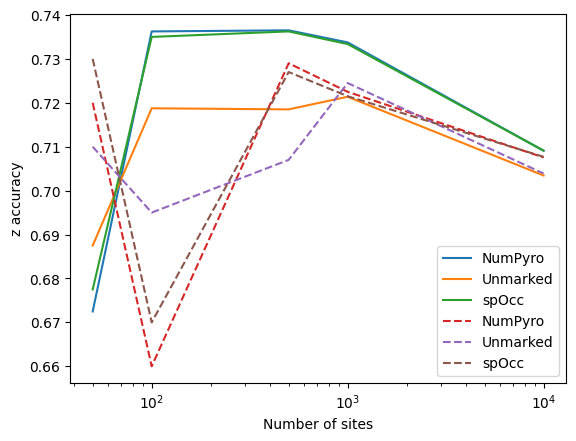

In [5]:
dfm = df.groupby(["n_sites", "deployment_days_per_site", "method", "split"]).mean().reset_index()
dfm[(dfm.deployment_days_per_site == 365) & (dfm.split == "train")].set_index("n_sites").groupby("method")["z_acc"].plot(x="n_sites", xlabel="Number of sites", ylabel="z accuracy", legend=True)
dfm[(dfm.deployment_days_per_site == 365) & (dfm.split == "test")].set_index("n_sites").groupby("method")["z_acc"].plot(x="n_sites", xlabel="Number of sites", ylabel="z accuracy", legend=True, linestyle="--")
plt.xscale("log")

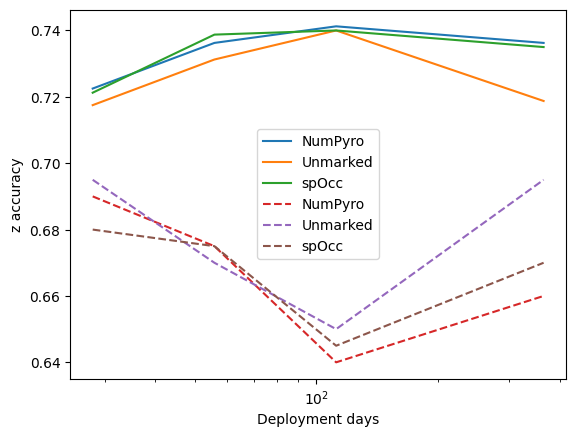

In [9]:
dfm = df.groupby(["n_sites", "deployment_days_per_site", "method", "split"]).mean().reset_index()
dfm[(dfm.n_sites == 100) & (dfm.split == "train")].set_index("deployment_days_per_site").groupby("method")["z_acc"].plot(x="n_sites", xlabel="Deployment days", ylabel="z accuracy", legend=True)
dfm[(dfm.n_sites == 100) & (dfm.split == "test")].set_index("deployment_days_per_site").groupby("method")["z_acc"].plot(x="n_sites", xlabel="Deployment days", ylabel="z accuracy", legend=True, linestyle="--")
plt.xscale("log")